#Objective of k-means clustering
To find and recommend the best
cities in California for investment in the
housing market. Usually, the cities with high
property value are also the one with the
best location in terms of school rating,
connectivity, low crime rate, public
transport, and walkability etc. These cities
are suitable for the elderly, families and
individuals who want to live in a good
community. Since such cities are in high
demand and always sought after, they form
golden clusters of cities for the purpose of
investment and good return on the
investment. The goal of the project is to find
the relation of median price per sqft
increment for housing with other important
factors like crime rate, school score,
average household income etc. and then
finds a golden cluster of these cities. Cities
in the golden cluster can be recommended
to anyone who wants to live in a good city
or wants to invest for high returns.

In [ ]:
import pandas as pd
from google.colab import files
uploaded = files.upload()


Saving house_cleaned_data.csv to house_cleaned_data (1).csv


# DataSet

In [ ]:
import io
cluster_df_org = pd.read_csv(io.StringIO(uploaded['house_cleaned_data.csv'].decode('utf-8')))
cluster_df = cluster_df_org.drop(['address','area','image','listing_type','broker_name','input','property_url','listing_url'], axis=1)
cluster_df

,rank,property_id,latitude,longitude,price,bathrooms,bedrooms,zestimate,rent_zestimate,days_on_zillow
0,205,70983496,29.599431,-98.254866,296000.0,3.0,3.0,270100.0,2024.0,0.0
1,66,97629907,29.557442,-95.751786,425000.0,3.0,2.0,436000.0,2967.0,0.0
2,790,28157774,29.974863,-95.580004,325000.0,3.0,5.0,305600.0,2578.0,0.0
3,175,52871041,30.101684,-93.749762,262000.0,4.0,5.0,189400.0,2125.0,0.0
4,479,53580872,29.809318,-95.983255,529999.0,3.0,4.0,446900.0,2566.0,0.0
...,...,...,...,...,...,...,...,...,...,...
308,156,27797191,29.788861,-95.485608,1375000.0,3.0,5.0,1376300.0,8355.0,0.0
309,462,50315804,30.659956,-96.341943,399900.0,4.0,5.0,380400.0,3195.0,0.0
310,678,28824579,27.759494,-97.396044,174999.0,1.0,2.0,154100.0,1300.0,0.0
311,516,28068451,29.738645,-95.549303,459000.0,2.0,4.0,507100.0,2900.0,0.0


# K-Mean Clustering

In [ ]:
# K means
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score 
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
# Fit K-Means
kmeans_1 = KMeans(n_clusters=4,random_state= 10)
# Use fit_predict to cluster the dataset
predictions = kmeans_1.fit_predict(cluster_df)
# Calculate cluster validation metrics
score_kemans_s = silhouette_score(cluster_df, kmeans_1.labels_, metric='euclidean')
score_kemans_c = calinski_harabasz_score(cluster_df, kmeans_1.labels_)
score_kemans_d = davies_bouldin_score(cluster_df, predictions)
print('Silhouette Score: %.4f' % score_kemans_s)
print('Calinski Harabasz Score: %.4f' % score_kemans_c)
print('Davies Bouldin Score: %.4f' % score_kemans_d)

Silhouette Score: 0.7273
Calinski Harabasz Score: 40857.8939
Davies Bouldin Score: 0.3171


# Visualization

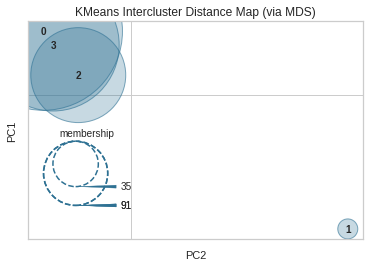

In [ ]:
# Inter cluster distance map
from yellowbrick.cluster import InterclusterDistance
# Instantiate the clustering model and visualizer
visualizer = InterclusterDistance(kmeans_1)
visualizer.fit(cluster_df)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure